- Importamos Keras y Tenserflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

- Cargar Datos:

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

- Importamos un compuesto de datos MNIST que tiene un total de mas de 70.000 imagenes que contiene digitos de 0 al 9 escrito a mano. Estos datos se usaran para entrenar este modelo del trabajo.

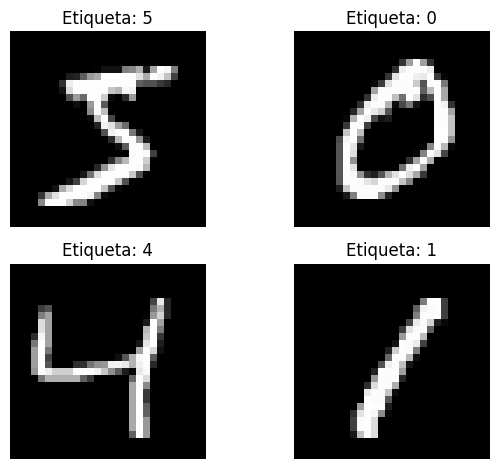

In [ ]:
plt.figure()
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

- Normalizamos las Imagenes.

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

- Aplanar las imágenes para PCA.

In [ ]:
X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

- Aplicar PCA para reducir la dimensionalidad.

In [ ]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

In [ ]:
print(f"Dimensiones originales: {X_train_flat.shape}")
print(f"Dimensiones reducidas con PCA: {X_train_pca.shape}")

Dimensiones originales: (60000, 784)
Dimensiones reducidas con PCA: (60000, 154)


- Estamos realizando aprendizaje supervisado.
- Normalizamos los pixeles el nivel de negro varia entre 0 y 1 en vez de 0 y 255.
- Redimensionamos los datos, añadiendo una dimensión extra.
- Convertimos las etiquetas.

In [ ]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

- Convertir etiquetas a one-hot encoding.

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

- Definimos la arquitectura de nuestro modelo que trata de un CNN.

In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Entrenar el modelo CNN

In [ ]:
cnn_model.fit(X_train_cnn, y_train_one_hot,
              epochs=5, batch_size=32,
              validation_data=(X_test_cnn, y_test_one_hot))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.8481 - loss: 0.4727 - val_accuracy: 0.9834 - val_loss: 0.0503
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9703 - loss: 0.0992 - val_accuracy: 0.9891 - val_loss: 0.0331
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9793 - loss: 0.0697 - val_accuracy: 0.9881 - val_loss: 0.0327
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9828 - loss: 0.0591 - val_accuracy: 0.9919 - val_loss: 0.0257
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9837 - loss: 0.0520 - val_accuracy: 0.9906 - val_loss: 0.0251


- Evaluación del modelo CNN.

In [ ]:
_, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_one_hot, verbose=0)
print(f"Accuracy del modelo CNN: {cnn_accuracy * 100:.2f}%")

Accuracy del modelo CNN: 99.06%


- Modelo con PCA y red densa:

In [ ]:
pca_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

pca_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Entrenar el modelo PCA

In [ ]:
pca_model.fit(X_train_pca, y_train_one_hot,
              epochs=10, batch_size=32,
              validation_data=(X_test_pca, y_test_one_hot))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8591 - loss: 0.5048 - val_accuracy: 0.9615 - val_loss: 0.1257
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9717 - loss: 0.0930 - val_accuracy: 0.9738 - val_loss: 0.0893
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9833 - loss: 0.0567 - val_accuracy: 0.9740 - val_loss: 0.0864
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9884 - loss: 0.0392 - val_accuracy: 0.9756 - val_loss: 0.0837
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9926 - loss: 0.0250 - val_accuracy: 0.9744 - val_loss: 0.0843
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9940 - loss: 0.0197 - val_accuracy: 0.9772 - val_loss: 0.0842
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9959 - loss: 0.0137 - val_accuracy: 0.9734 - val_loss: 0.1070
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9957 - loss: 0.0133 - 

- Evaluación del modelo PCA

In [ ]:
_, pca_accuracy = pca_model.evaluate(X_test_pca, y_test_one_hot, verbose=0)
print(f"Accuracy del modelo con PCA: {pca_accuracy * 100:.2f}%")

Accuracy del modelo con PCA: 97.46%


- Predicciones del modelo CNN

In [ ]:
predictions = cnn_model.predict(X_test[:30])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


- Visualizar predicciones y etiquetas reales

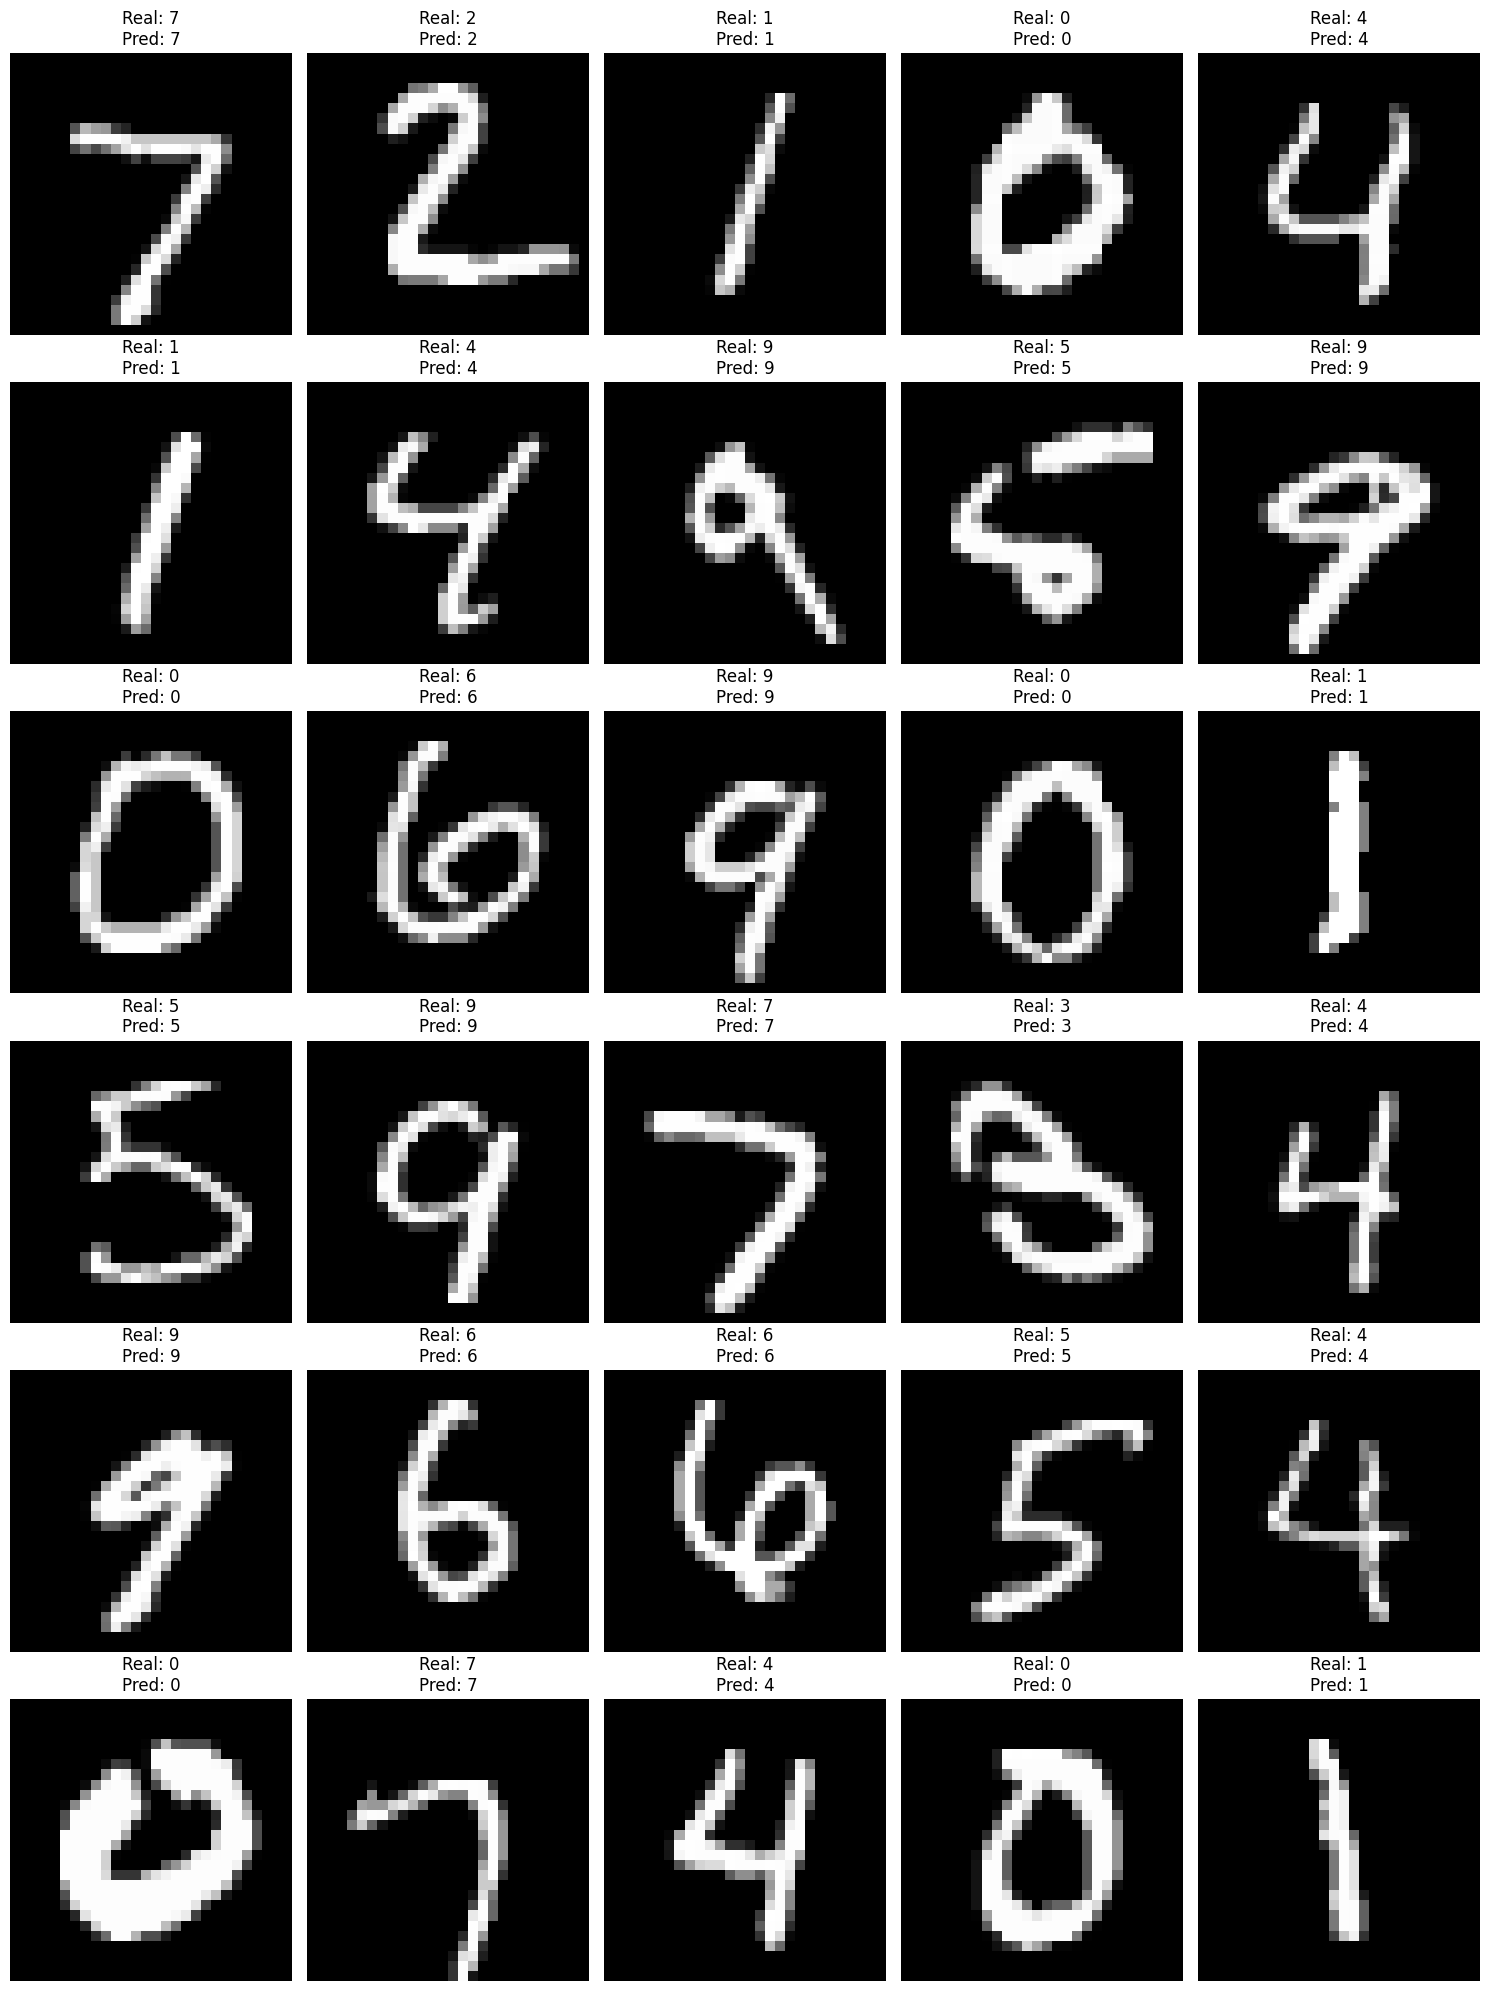

In [ ]:
plt.figure(figsize=(15, 20))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {np.argmax(y_test_one_hot[i])}\nPred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

- Imprimir confianza y etiquetas reales/predichas

In [ ]:
for i in range(30):
    print(f"Imagen {i + 1}:")
    print(f"Etiqueta real: {np.argmax(y_test_one_hot[i])}")
    print(f"Predicción: {np.argmax(predictions[i])}")
    print(f"Confianza: {np.max(predictions[i]) * 100:.2f}%")
    print("-" * 30)

Imagen 1:
Etiqueta real: 7
Predicción: 7
Confianza: 100.00%
------------------------------
Imagen 2:
Etiqueta real: 2
Predicción: 2
Confianza: 100.00%
------------------------------
Imagen 3:
Etiqueta real: 1
Predicción: 1
Confianza: 100.00%
------------------------------
Imagen 4:
Etiqueta real: 0
Predicción: 0
Confianza: 99.99%
------------------------------
Imagen 5:
Etiqueta real: 4
Predicción: 4
Confianza: 100.00%
------------------------------
Imagen 6:
Etiqueta real: 1
Predicción: 1
Confianza: 100.00%
------------------------------
Imagen 7:
Etiqueta real: 4
Predicción: 4
Confianza: 99.99%
------------------------------
Imagen 8:
Etiqueta real: 9
Predicción: 9
Confianza: 99.98%
------------------------------
Imagen 9:
Etiqueta real: 5
Predicción: 5
Confianza: 99.32%
------------------------------
Imagen 10:
Etiqueta real: 9
Predicción: 9
Confianza: 99.92%
------------------------------
Imagen 11:
Etiqueta real: 0
Predicción: 0
Confianza: 100.00%
------------------------------
Im

1. **Rendimiento del modelo:**
   - El modelo basado en CNN alcanzó una precisión del {:.2f}% en el conjunto de prueba, lo cual demuestra su capacidad para generalizar correctamente sobre datos no vistos.
   - La combinación de capas convolucionales, max-pooling y dropout ayudó a capturar características relevantes y prevenir el sobreajuste.

2. **Entrenamiento:**
   - El entrenamiento se realizó en 5 épocas con un tamaño de batch de 32. Esto fue suficiente para lograr un buen equilibrio entre rendimiento y tiempo de cómputo.
   - El optimizador Adam, junto con la función de pérdida categórica cruzada, permitió una convergencia eficiente.

3. **Datos y predicciones:**
   - Se trabajó con el conjunto de datos MNIST, que contiene imágenes de dígitos escritos a mano normalizadas a 28x28 píxeles.
   - El modelo realizó predicciones sobre las primeras 30 imágenes del conjunto de prueba. En la mayoría de los casos, las predicciones fueron correctas, y las probabilidades asociadas indicaron una alta confianza en los resultados.

4. **Uso de TensorFlow:**
   - TensorFlow fue fundamental para implementar la arquitectura de la red neuronal de manera eficiente.
   - Su API de alto nivel (Keras) facilitó la construcción, entrenamiento y evaluación del modelo, además de manejar automáticamente operaciones complejas en GPU/CPU.

5. **Conclusión general:**
   - El proyecto demostró la capacidad de una CNN para resolver problemas de clasificación de imágenes con un rendimiento destacado.
   - TensorFlow se consolida como una herramienta poderosa y accesible para implementar modelos de aprendizaje profundo en tareas similares.
""".format(cnn_accuracy * 100))